**Implementing a pseudo-random number generator (PRNG)** - An algorithm that generates a sequence of numbers that exhibit properties of randomness

a simple PRNG algorithm called is **Linear Congruential Generator (LCG)** - The LCG algorithm is defined by the following recurrence relation:

$X_{n+1} = (a \cdot X_n + c) \mod m$

- $X_{n+1}$ represents the next pseudo-random number in the sequence.
- $X_n$ is the current pseudo-random number in the sequence.
- $a$ is the multiplier, which determines the overall distribution and period of the generated sequence.
- $c$ is the increment, which shifts the generated sequence.
- $m$ is the modulus, which determines the range of values that the generated numbers can take.



In [169]:
def lcg(seed, Total_sample):
    a = 1103515245
    c = 12345
    m = 2 ** 31
    result = []
    current = seed

    for _ in range(Total_sample):
        current = (a * current + c) % m
        random_number = current / float(m)  # Normalize to range [0, 1]
        result.append(random_number)

    return result

# Example usage:
random_numbers = lcg(42, 100)
#print(random_numbers)


Plot histogram

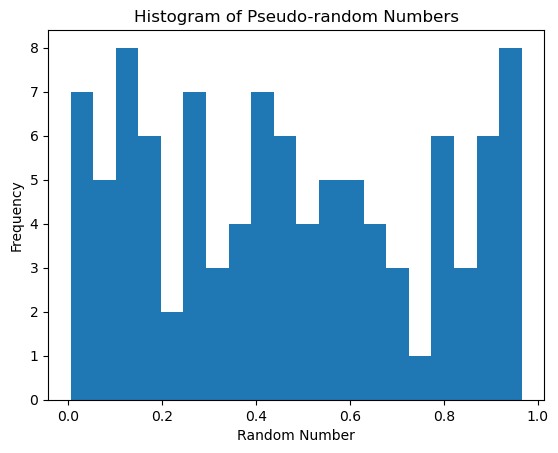

In [170]:
import matplotlib.pyplot as plt
plt.hist(random_numbers, bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

**Using PyTorch**

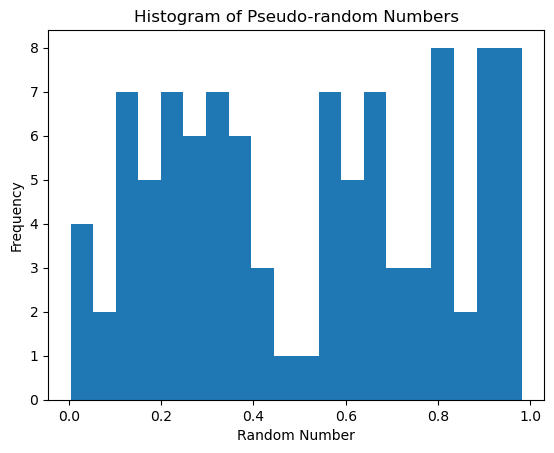

In [171]:
import torch
random_numbers=torch.rand(100)
plt.hist(random_numbers, bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

Convert **Unifom Sampling** to **Bernoulli Sampling**  

we can use the probablity $(p)$ of outcome 1 and $(1-p)$ of outcome 0

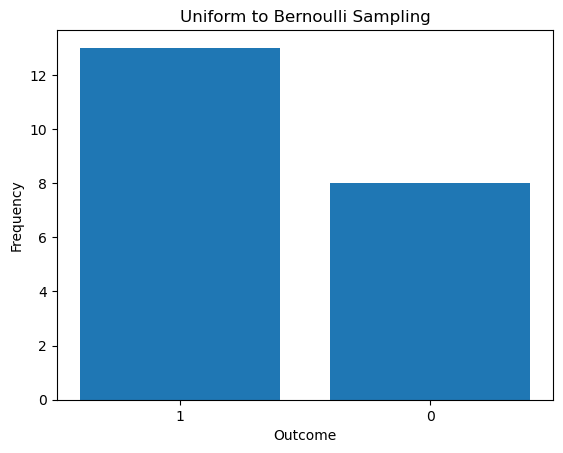

In [172]:

import torch.distributions as dist




success_rate = bernoulli_samples.sum().item()
failure_rate = len(bernoulli_samples) - success_rate

plt.bar(['1', '0'], [success_rate, failure_rate])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Uniform to Bernoulli Sampling')
plt.show()



***function for uniform to Bernoulli***


In [173]:
def Uniform_to_Bernoulli(samples, threshold):
    bernoulli_dist = dist.Bernoulli(torch.tensor([threshold]))
    bernoulli_samples = bernoulli_dist.sample(samples.shape)
    return bernoulli_samples


***generate the uniform samples***

In [174]:
torch.manual_seed(42)

uniform_samples = torch.rand(10000)

***Uniform -> Bernoulli***

In [175]:

bernoulli_samples = Uniform_to_Bernoulli(uniform_samples, 0.7)
#print(bernoulli_samples)
success_samples = bernoulli_samples.sum().item()
failure_samples = len(bernoulli_samples) - success_samples
print(success_samples)
print(failure_samples)

7025.0
2975.0


***Plot the success $p(1)$ and $1-p(0)$***   

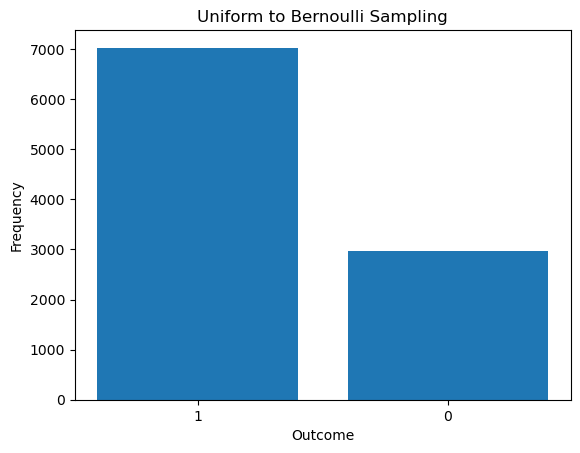

In [176]:
plt.bar(['1', '0'], [success_samples, failure_samples])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Uniform to Bernoulli Sampling')
plt.show()

Now we convert **Bernoulli distribution** to a **categorical distribution**

***function for Bernoulli to Categorical distributions***

In [177]:
def Bernoulli_to_Categorical(samples):
    categorical_dist = dist.Categorical(torch.stack([(1 - samples), samples], dim=1))
    categorical_samples = categorical_dist.sample().long()
    return categorical_samples

In [178]:


torch.manual_seed(42)

bernoulli_samples = torch.tensor([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])
categorical_samples = Bernoulli_to_Categorical(bernoulli_samples)

category_counts = torch.bincount(categorical_samples)
categories = torch.arange(len(category_counts))

# Calculate category probabilities
total_samples = len(categorical_samples)
category_probabilities = category_counts.float() / total_samples



***Plot the bar chart with category probabilities***


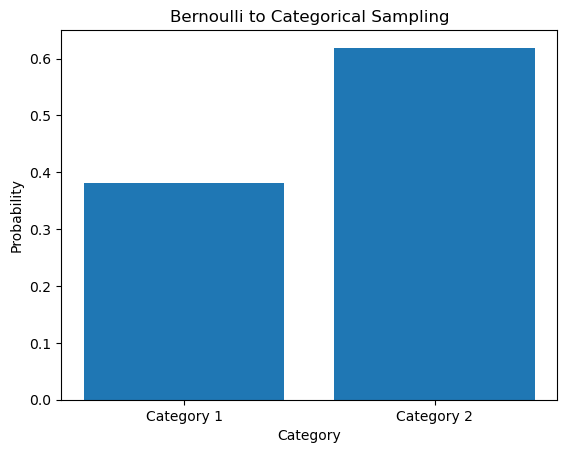

In [179]:
plt.bar(categories, category_probabilities)
plt.xlabel('Category')
plt.ylabel('Probability')
plt.title('Bernoulli to Categorical Sampling')
plt.xticks(categories, ['Category 1', 'Category 2'])

plt.show()

### Univariate Normal Distribution

***Box Muller Method***

In [180]:


# Number of samples
num_samples = 10000

# Generate uniform random numbers in range [0, 1)
u1 = np.random.rand(num_samples)
u2 = np.random.rand(num_samples)

# Apply Box-Muller transformation
z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)



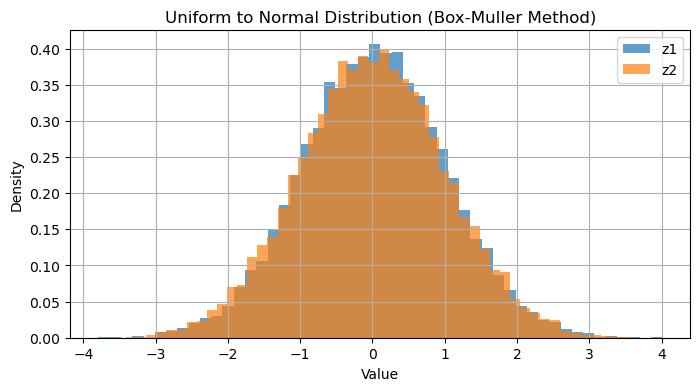

In [181]:
# Plot the transformed samples
plt.figure(figsize=(8, 4))
plt.hist(z1, bins=50, density=True, alpha=0.7, label='z1')
plt.hist(z2, bins=50, density=True, alpha=0.7, label='z2')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Uniform to Normal Distribution (Box-Muller Method)')
plt.legend()
plt.grid(True)
plt.show()
